In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\SWELL.csv').drop(columns="datasetId")
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,no stress


In [3]:
x=df.drop('condition',axis=1)
y=df.condition

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(247423, 34) (121866, 34) (247423,) (121866,)


In [5]:
X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [6]:
knn_best_params = {
    'n_neighbors': 35
}
knn = KNeighborsClassifier(**knn_best_params)

In [9]:
ann_best_params = {
    'activation': 'relu',
    'hidden_layer_sizes': (10, 20),
    'max_iter': 2000,
    'solver': 'adam'
}
ann = MLPClassifier(**ann_best_params, random_state=0)


In [13]:
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, y_predict) 
knn_cr = classification_report(y_test,y_predict)
knn_accuracy =  accuracy_score(y_test, y_predict)


In [14]:
ann.fit(X_train, y_train)
y_predict = ann.predict(X_test)
ann_cm = confusion_matrix(y_test, y_predict)
ann_cr = classification_report(y_test,y_predict)
ann_accuracy = accuracy_score(y_test, y_predict)

In [25]:
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
y_predict = rf_clf.predict(X_test)
rf_cm = confusion_matrix(y_test, y_predict)
rf_cr = classification_report(y_test,y_predict)
rf_accuracy = accuracy_score(y_test, y_predict)

In [28]:
print('===============================================================================')
print('                                   Result                                      ')
print('===============================================================================')

print('\nKNN:')
print('\nConfusion Matrix:')
print("\n ",knn_cm)
print('\nClassification Report:')
print("\n ",knn_cr)
print('Accuracy:')
print(" {:.4%}".format(knn_accuracy))

print('-------------------------------------------------------------------------------')
print('\n\nANN:')
print('\nConfusion Matrix:')
print("\n ",ann_cm)
print('\nClassification Report:')
print("\n ",ann_cr)
print('Accuracy:')
print(" {:.4%}".format(ann_accuracy))

print('-------------------------------------------------------------------------------')
print('\n\nRandom Forest:')
print('\nConfusion Matrix:')
print("\n ",rf_cm)
print('\nClassification Report:')
print("\n ",rf_cr)
print('Accuracy:')
print(" {:.4%}".format(rf_accuracy))

                                   Result                                      

KNN:

Confusion Matrix:

  [[34636     0     0]
 [    0 66040     0]
 [    0     0 21190]]

Classification Report:

                 precision    recall  f1-score   support

 interruption       0.97      0.96      0.96     34636
    no stress       0.97      0.97      0.97     66040
time pressure       0.95      0.95      0.95     21190

     accuracy                           0.96    121866
    macro avg       0.96      0.96      0.96    121866
 weighted avg       0.96      0.96      0.96    121866

Accuracy:
 96.3919%
-------------------------------------------------------------------------------


ANN:

Confusion Matrix:

  [[20085 13491  1060]
 [ 1253 63025  1762]
 [  475  7764 12951]]

Classification Report:

                 precision    recall  f1-score   support

 interruption       0.92      0.58      0.71     34636
    no stress       0.75      0.95      0.84     66040
time pressure       0.82   

****************************************************************************
                           Visualization                                    
****************************************************************************

KNN COnfusion Matrix HeatMap:


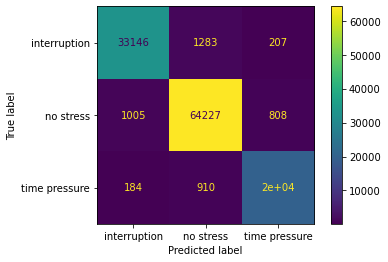

In [35]:
print('****************************************************************************')
print('                           Visualization                                    ')
print('****************************************************************************')

print('\nKNN COnfusion Matrix HeatMap:')
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()



ANN COnfusion Matrix HeatMap:


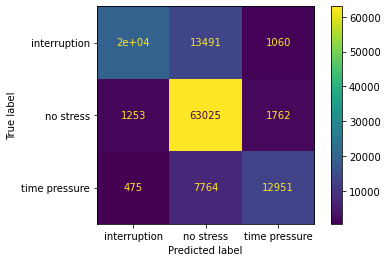

In [36]:
print('\nANN COnfusion Matrix HeatMap:')
plot_confusion_matrix(ann, X_test, y_test)  
plt.show()


Random Forest COnfusion Matrix HeatMap:


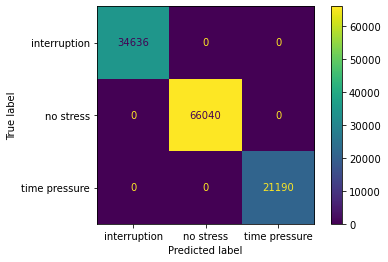

In [37]:
print('\nRandom Forest COnfusion Matrix HeatMap:')
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()

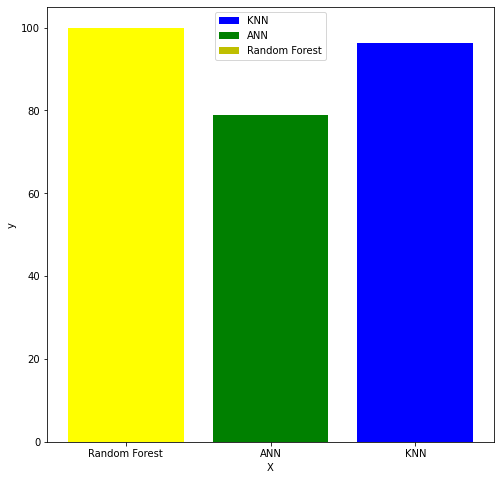

In [42]:
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

a=np.arange(3)
b=np.arange(2)
c=np.arange(1)

fig,ax=plt.subplots(figsize=(8,8),edgecolor='k')
p1=ax.bar(a,knn_accuracy,color='b')
p2=ax.bar(b,ann_accuracy,color='g')
p3=ax.bar(c,rf_accuracy,color='y')

x = ['Random Forest','ANN','KNN']
y = [rf_accuracy*100, ann_accuracy*100, knn_accuracy*100]

plt.bar(x, y, color=['yellow', 'green', 'blue'])

ax.legend((p1[0],p2[0],p3[0]),('KNN','ANN','Random Forest'))
plt.xlabel('X')
plt.ylabel('y')
plt.show()